In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

Preprocessing

In [2]:
data = pd.read_csv('diabetes_dataset.csv')

In [3]:
data.head()

,preg,glu,bp,skin,ins,bmi,ped,age,target
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,0.0,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   glu     768 non-null    int64  
 2   bp      768 non-null    int64  
 3   skin    691 non-null    float64
 4   ins     768 non-null    int64  
 5   bmi     691 non-null    float64
 6   ped     768 non-null    float64
 7   age     768 non-null    int64  
 8   target  768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

preg       0
glu        0
bp         0
skin      77
ins        0
bmi       77
ped        0
age        0
target     0
dtype: int64

In [6]:
# Mean imputation for numerical columns
imputer_mean = SimpleImputer(strategy='mean')
data[['skin','bmi']] = imputer_mean.fit_transform(data[['skin','bmi']])

print('Dataset after mean imputation:')
data.head()

Dataset after mean imputation:


,preg,glu,bp,skin,ins,bmi,ped,age,target
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,0.0,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1


In [7]:
data.isnull().sum()

preg      0
glu       0
bp        0
skin      0
ins       0
bmi       0
ped       0
age       0
target    0
dtype: int64

In [8]:
columns_for_replacing = ['glu','bp','skin','ins','age']
for column in columns_for_replacing:
    data[column].replace(0,data[column].mean(),inplace = True)

C:\Users\1212a\AppData\Local\Temp\ipykernel_12652\539914662.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].replace(0,data[column].mean(),inplace = True)


In [11]:
data.head()

,preg,glu,bp,skin,ins,bmi,ped,age,target
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.515195,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


Standardization

In [9]:
# Normalize the data
scaler = StandardScaler()


#drop target variable from X
X = data.drop('target',axis = 1)

#create "y" containing outcome target variable
y = data['target']

X_scaled = scaler.fit_transform(X)

Visualization

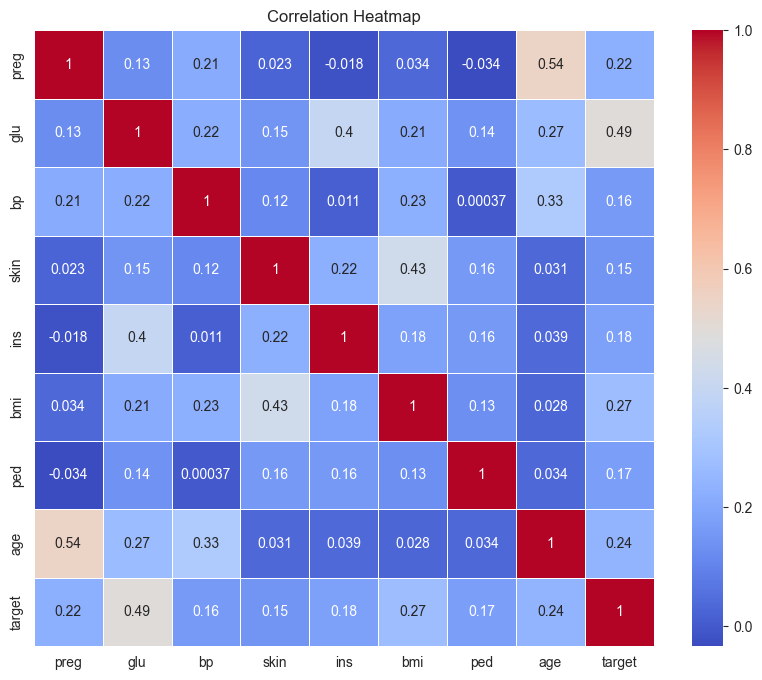

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[['preg','glu','bp','skin','ins','bmi','ped','age','target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Training Model ( Linear Regression )

In [1]:
X_l = data[['ins']].values
Y_l = data['glu'].values
# Split the data into training and testing sets
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, Y_l, test_size=0.2, random_state=41)
model_l = LinearRegression()
model_l.fit(X_train_l,y_train_l)

NameError: name 'data' is not defined

Training Model

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=41)

In [20]:
# Train logistic regression model using Scikit-Learn
model = LogisticRegression()
model.fit(X_train, y_train)


Testing Model

In [27]:
# Evaluate the model
y_pred = model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7857


Checking for new Datapoints


In [22]:
data.tail(3)

,preg,glu,bp,skin,ins,bmi,ped,age,target
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.515195,79.799479,30.1,0.349,47,1
767,1,93.0,70.0,31.000000,79.799479,30.4,0.315,23,0


In [23]:
X_new = np.array([[5,121,72,21,110,24,0.4,43],[6,111,40,21,120,20,0.4,80]])

In [24]:
# Normalize the new data
new_data_scaled = scaler.fit_transform(X_new)

# Make predictions
new_predictions = model.predict(new_data_scaled)

print("Predictions for new data points:", new_predictions)

Predictions for new data points: [1 0]
